In [2]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MaxAbsScaler
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/whitneyturner/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Read in data

In [8]:
#Paths

SP_500_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/S&P 500 Index.csv")
ARKK_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/ARKK.csv")

#Joe's Path
baba_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/BABA.csv")
pton_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/PTON.csv")
gm_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/GM.csv")
taco_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/TACO.csv")
auy_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/AUY.csv")

#Larry's Path
aa_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/AA.csv")
nio_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/NIO.csv")
pfe_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/PFE.csv")
xom_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/XOM.csv")
znga_path = Path("/Users/whitneyturner/Project-FI-Data/STD_and_Sharpe_Risk_Analysis/ZNGA.csv")

# Read in data for S&P 500 Index and ARKK
sp_500_portfolio = pd.read_csv(SP_500_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
arkk_portfolio = pd.read_csv(ARKK_path,index_col="Date", parse_dates=True, infer_datetime_format=True)

#Read in Joe's Top 5 data
joe_top5_baba_portfolio = pd.read_csv(baba_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
joe_top5_pton_portfolio = pd.read_csv(pton_path,index_col="Date" ,parse_dates=True, infer_datetime_format=True)
joe_top5_gm_portfolio = pd.read_csv(gm_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
joe_top5_taco_portfolio = pd.read_csv(taco_path,index_col="Date" ,parse_dates=True, infer_datetime_format=True)
joe_top5_auy_portfolio = pd.read_csv(auy_path, index_col="Date",parse_dates=True, infer_datetime_format=True)

#Read Larry's Top 5 data
larry_top5_aa_portfolio = pd.read_csv(aa_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
larry_top5_nio_portfolio = pd.read_csv(nio_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
larry_top5_pfe_portfolio = pd.read_csv(pfe_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
larry_top5_xom_portfolio = pd.read_csv(xom_path,index_col="Date", parse_dates=True, infer_datetime_format=True)
larry_top5_znga_portfolio = pd.read_csv(znga_path, index_col="Date",parse_dates=True, infer_datetime_format=True)

# Rename Columns
sp_500_portfolio = sp_500_portfolio.rename(columns={"Close":"SP500"})
arkk_portfolio = arkk_portfolio.rename(columns={"Close":"ARKK"})

# Drop na
sp_500_portfolio = sp_500_portfolio.dropna()
arkk_portfolio = arkk_portfolio.dropna()



In [9]:
#Rename Colums For Joe's Top 5 and concat Dataframe
joe_top5_baba = joe_top5_baba_portfolio.rename(columns={"Close":"BABA"})
joe_top5_pton = joe_top5_pton_portfolio.rename(columns={"Close":"PTON"})
joe_top5_gm = joe_top5_gm_portfolio.rename(columns={"Close":"GM"})
joe_top5_taco = joe_top5_taco_portfolio.rename(columns={"Close":"TACO"})
joe_top5_auy = joe_top5_auy_portfolio.rename(columns={"Close":"AUY"})
joe_top5 = pd.concat([joe_top5_baba,joe_top5_pton,joe_top5_gm,joe_top5_taco,joe_top5_auy], axis='columns', join='inner').dropna()
joe_top5.head()

,BABA,PTON,GM,TACO,AUY
Date,,,,,
2019-09-26 16:00:00,175.00,25.76,37.61,10.20,3.38
2019-09-27 16:00:00,165.98,25.24,37.42,10.28,3.28
2019-09-30 16:00:00,167.23,25.10,37.48,10.23,3.18
2019-10-01 16:00:00,165.15,22.51,36.11,10.10,3.27
2019-10-02 16:00:00,165.77,22.60,34.68,9.84,3.35


In [11]:
#Rename Colums For Joe's Top 5 and concat Dataframe
larry_top5_aa = larry_top5_aa_portfolio.rename(columns={"Close":"AA"})
larry_top5_nio = larry_top5_nio_portfolio.rename(columns={"Close":"NIO"})
larry_top5_pfe = larry_top5_pfe_portfolio.rename(columns={"Close":"PFE"})
larry_top5_xom = larry_top5_xom_portfolio.rename(columns={"Close":"XOM"})
larry_top5_znga = larry_top5_znga_portfolio.rename(columns={"Close":"ZNGA"})
larry_top5 = pd.concat([larry_top5_aa,larry_top5_nio,larry_top5_pfe,larry_top5_xom,larry_top5_znga], axis='columns', join='inner').dropna()
larry_top5.head()

,AA,NIO,PFE,XOM,ZNGA
Date,,,,,
2018-09-12 16:00:00,42.02,6.60,40.18,83.13,4.03
2018-09-13 16:00:00,41.77,11.60,40.59,82.32,3.98
2018-09-14 16:00:00,42.79,9.90,40.70,82.92,4.02
2018-09-17 16:00:00,42.83,8.50,40.74,83.41,3.95
2018-09-18 16:00:00,43.12,7.68,41.22,83.63,4.02


### Calculate daily returns 

In [13]:
# Calculate daily returns for S&P 500 Index
sp_500_returns = sp_500_portfolio.pct_change().dropna()
sp_500_returns.head()

,SP500
Date,
2018-05-30 16:00:00,-0.020833
2018-05-31 16:00:00,0.021277
2018-06-01 16:00:00,0.041667
2018-06-05 16:00:00,-0.040000
2018-06-06 16:00:00,0.000000


In [14]:
# Calculate daily returns for ARKK EFT
arkk_returns = arkk_portfolio.pct_change().dropna()
arkk_returns.head()

,ARKK
Date,
2018-05-25 16:00:00,-0.001387
2018-05-29 16:00:00,-0.002778
2018-05-30 16:00:00,0.013931
2018-05-31 16:00:00,-0.004351
2018-06-01 16:00:00,0.006670


In [15]:
joe_top5_returns = joe_top5.pct_change().dropna()
joe_top5_returns.head()

,BABA,PTON,GM,TACO,AUY
Date,,,,,
2019-09-27 16:00:00,-0.051543,-0.020186,-0.005052,0.007843,-0.029586
2019-09-30 16:00:00,0.007531,-0.005547,0.001603,-0.004864,-0.030488
2019-10-01 16:00:00,-0.012438,-0.103187,-0.036553,-0.012708,0.028302
2019-10-02 16:00:00,0.003754,0.003998,-0.039601,-0.025743,0.024465
2019-10-03 16:00:00,0.022380,-0.011947,0.008651,0.005081,0.002985


In [16]:
larry_top5_returns= larry_top5.pct_change().dropna()
larry_top5_returns.head()

,AA,NIO,PFE,XOM,ZNGA
Date,,,,,
2018-09-13 16:00:00,-0.005950,0.757576,0.010204,-0.009744,-0.012407
2018-09-14 16:00:00,0.024419,-0.146552,0.002710,0.007289,0.010050
2018-09-17 16:00:00,0.000935,-0.141414,0.000983,0.005909,-0.017413
2018-09-18 16:00:00,0.006771,-0.096471,0.011782,0.002638,0.017722
2018-09-19 16:00:00,-0.011364,0.106771,-0.005822,0.011957,-0.024876


### `Concat` portfolios into one DataFrame

In [17]:
# Concat returns DataFrames
all_returns = pd.concat([sp_500_returns, arkk_returns, joe_top5_returns, larry_top5_returns], axis='columns', join='inner')
all_returns.head()

,SP500,ARKK,BABA,PTON,GM,TACO,AUY,AA,NIO,PFE,XOM,ZNGA
Date,,,,,,,,,,,,
2019-09-27 16:00:00,0.000000,-0.009984,-0.051543,-0.020186,-0.005052,0.007843,-0.029586,-0.018104,-0.107143,0.012094,0.007186,-0.026667
2019-10-01 16:00:00,0.000000,-0.023082,-0.012438,-0.103187,-0.036553,-0.012708,0.028302,-0.010463,-0.153846,-0.014101,-0.023509,-0.006873
2019-10-02 16:00:00,0.000000,-0.015036,0.003754,0.003998,-0.039601,-0.025743,0.024465,-0.028197,0.204545,-0.020560,-0.026106,-0.008651
2019-10-08 16:00:00,-0.051282,-0.033547,-0.037963,-0.012761,-0.025036,-0.001027,0.035503,-0.039481,0.096774,-0.011196,-0.019406,-0.005008
2019-10-09 16:00:00,0.000000,0.014032,0.020132,0.034037,0.007674,-0.019527,-0.017143,-0.004327,-0.035294,0.007449,0.011094,0.028523


### Calculate `std dev` for all data

In [18]:
# Calculate std dev
all_portfolio_std = all_returns.std()
all_portfolio_std

SP500    0.069670
ARKK     0.031003
BABA     0.025135
PTON     0.046693
GM       0.036100
TACO     0.048196
AUY      0.038882
AA       0.050346
NIO      0.062686
PFE      0.021034
XOM      0.031653
ZNGA     0.026231
dtype: float64

In [19]:
#Normalize 

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(all_returns)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_

# array([4.0e+05, 1.7e+01])
# transform the data using the parameters calculated by the fit method (the maximum absolute values)

all_returns_scaled_data = abs_scaler.transform(all_returns)

# store the results in a data frame
df_scaled = pd.DataFrame(all_returns_scaled_data, columns=all_returns.columns).dropna()
df_scaled.head()

,SP500,ARKK,BABA,PTON,GM,TACO,AUY,AA,NIO,PFE,XOM,ZNGA
0,0.000000,-0.064117,-0.556040,-0.099512,-0.025331,0.022953,-0.162174,-0.064156,-0.471831,0.134888,0.056643,-0.199259
1,0.000000,-0.148238,-0.134180,-0.508679,-0.183285,-0.037189,0.155136,-0.037080,-0.677501,-0.157268,-0.185306,-0.051355
2,0.000000,-0.096562,0.040500,0.019710,-0.198570,-0.075335,0.134104,-0.099924,0.900768,-0.229307,-0.205772,-0.064639
3,-0.166667,-0.215447,-0.409546,-0.062905,-0.125536,-0.003005,0.194609,-0.139909,0.426170,-0.124871,-0.152963,-0.037423
4,0.000000,0.090119,0.217184,0.167791,0.038480,-0.057146,-0.093968,-0.015333,-0.155427,0.083082,0.087449,0.213134


In [20]:
all_scaled_portfolio_std = df_scaled.std()
all_scaled_portfolio_std

SP500    0.226427
ARKK     0.199109
BABA     0.271152
PTON     0.230183
GM       0.181013
TACO     0.141043
AUY      0.213132
AA       0.178415
NIO      0.276052
PFE      0.234587
XOM      0.249497
ZNGA     0.196001
dtype: float64

### Calculate `sharpe ratio` for all data

In [29]:
# Calculate sharpe ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios.head()

SP500    0.837623
ARKK     0.632322
BABA    -0.095681
PTON     0.967680
GM       0.692024
dtype: float64

### Plot Sharpe Ratios

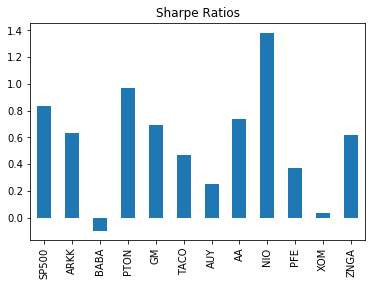

In [26]:
# Plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

In [27]:
# save All returns Dataframe to CSV
all_returns.to_csv('Sharpe_Ratio_returns.csv')